In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from kneed import KneeLocator
import collections
from sklearn.model_selection import cross_validate
import pickle


In [3]:
data = pd.read_csv("./datasets/epaa_dataset_2.csv")

subjects = data["Subject"]

data.drop("Subject", axis=1, inplace=True)
data.drop("Unknown", axis=1, inplace=True)

Y = data["Activity"]

data.drop("Activity", axis=1, inplace=True)

X = data[data.columns.to_list()]

X.head()

,0,1,2,3,4,5,6,7,8,9,...,443,444,445,446,447,448,449,450,451,452
0,7.609005,7.322882,7.281458,7.753253,8.043099,8.215854,8.388745,8.578034,8.658356,8.670648,...,-6.372120,-6.323450,-6.474440,-6.449742,-6.415010,-6.514918,-6.590504,-6.535514,-6.453252,-6.182647
1,8.507709,8.480922,8.747757,8.863954,8.863968,8.458413,7.782317,7.412026,7.589061,7.709209,...,-6.785400,-6.583993,-6.291560,-6.472510,-6.626783,-6.774500,-6.929722,-6.846734,-6.704524,-6.513264
2,8.442040,8.632098,8.730012,8.697698,8.552650,8.057508,0.395888,-0.090756,-0.335575,-0.507582,...,-6.403487,-6.450791,-6.612762,-6.830472,-6.872514,-7.249798,-7.414935,-7.278581,-7.127102,-6.832014
3,-11.025566,-11.714652,-11.765208,-9.944634,-7.660169,-6.882160,-7.601299,-9.161294,-10.339050,-11.046978,...,-7.715563,-7.764263,-7.755619,-8.040819,-8.091955,-7.817943,-7.768974,-7.687118,-7.795514,-7.819323
4,0.238472,0.321549,0.383802,0.495767,0.664556,0.776264,1.019609,1.010645,0.850412,0.473916,...,-7.614920,-7.553618,-7.381002,-7.324491,-7.473060,-7.441543,-7.546224,-7.474858,-7.441730,-7.412475


In [6]:
x, X_test, y , y_test = train_test_split(X,Y,test_size=0.15,random_state=0)

In [7]:
n_estimators = 20
n_repeats = 30
k_folds = 10

rf = np.zeros(n_estimators)
rf_acc = np.zeros(n_estimators)
rf_f1_micro = np.zeros(n_estimators)
rf_f1_macro = np.zeros(n_estimators)
rf_f1_weighted = np.zeros(n_estimators)

count = 1
for i in range (1, n_estimators + 1):
    rf[count-1] = i
    
    print("RF, max depth:",i)

    cv = RepeatedKFold(n_splits=k_folds, n_repeats=n_repeats, random_state=0)
    
    model = RandomForestClassifier(n_estimators=i, max_depth=5)
    
    scoring = ['accuracy', 'f1_micro', 'f1_macro', 'f1_weighted']
    
    scores = cross_validate(model, x, y, scoring=scoring, cv=cv, n_jobs=-1)
    
    rf_acc[count - 1] = scores['test_accuracy'].mean()
    
    count = count + 1

metrics_df = pd.DataFrame({
    'n_estimators': rf,
    'accuracy': rf_acc,
}) 

RF, max depth: 1
RF, max depth: 2
RF, max depth: 3
RF, max depth: 4
RF, max depth: 5
RF, max depth: 6
RF, max depth: 7
RF, max depth: 8
RF, max depth: 9
RF, max depth: 10
RF, max depth: 11
RF, max depth: 12
RF, max depth: 13
RF, max depth: 14
RF, max depth: 15
RF, max depth: 16
RF, max depth: 17
RF, max depth: 18
RF, max depth: 19
RF, max depth: 20


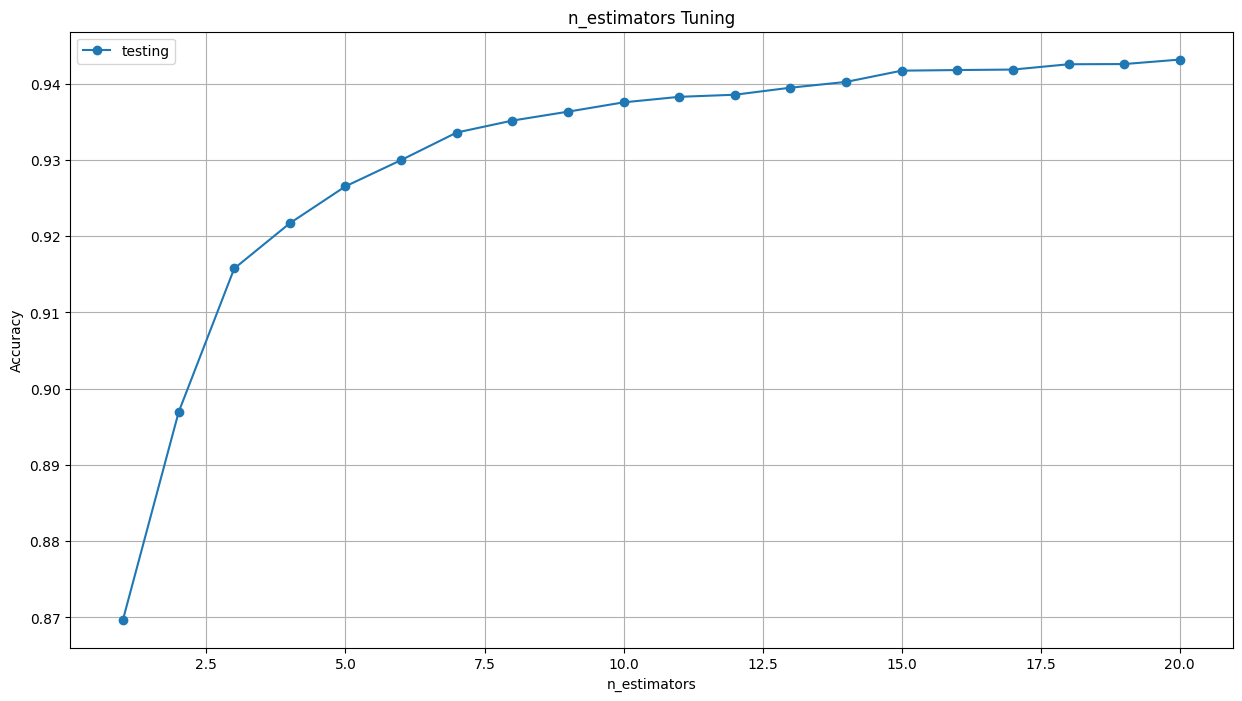

5.0


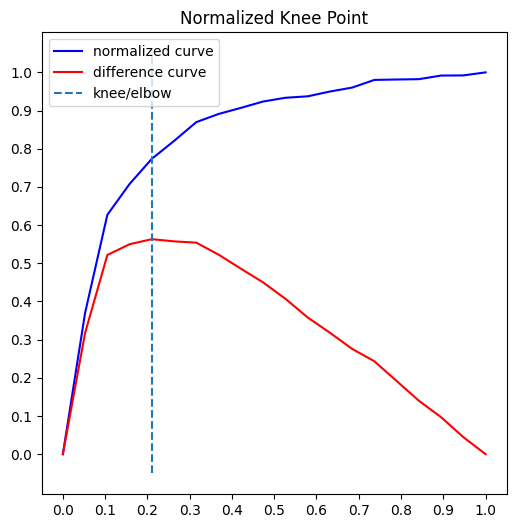

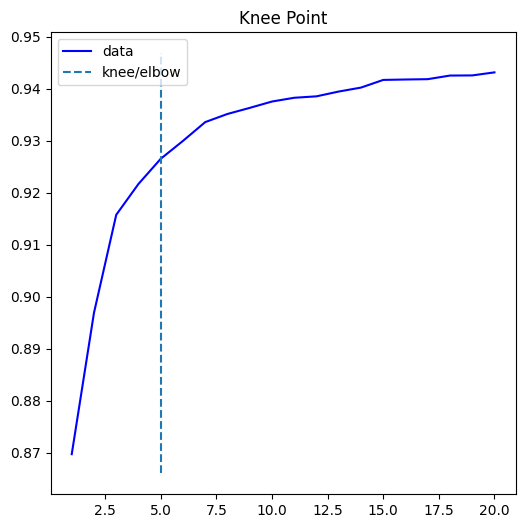

In [8]:

plt.figure(figsize=(15, 8))
plt.plot(rf, rf_acc, '-o', label="testing")
plt.legend()
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.title("n_estimators Tuning")
plt.show()

kneedle = KneeLocator(rf, rf_acc.tolist(), S=1.0, curve="concave", direction="increasing")

print(round(kneedle.knee, 3))
kneedle.plot_knee_normalized()
kneedle.plot_knee()

In [9]:
model = RandomForestClassifier(n_estimators=5, max_depth=5)
model.fit(x, y)  

y_train_hat = model.predict(x)
y_test_hat = model.predict(X_test)

#print(metrics.accuracy_score(y_test,y_test_hat))
print(metrics.confusion_matrix(y_test, y_test_hat))
#print(metrics.f1_score(y_test, y_test_hat, average=None))
print(metrics.classification_report(y_test, y_test_hat))

[[1096   33]
 [  90  547]]
              precision    recall  f1-score   support

         ADL       0.92      0.97      0.95      1129
        Fall       0.94      0.86      0.90       637

    accuracy                           0.93      1766
   macro avg       0.93      0.91      0.92      1766
weighted avg       0.93      0.93      0.93      1766


In [11]:
filename = 'D:/Estudios/Ciclo X 2024-I/DPY/TG/datos/finalized_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)